## Regression with a Tabular California Housing Dataset
### Playground Series - Season 3, Episode 1

### Dataset Description
The dataset for this competition (both train and test) was generated from a deep learning model trained on the California Housing Dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans

### Loading the file and analyzing the data

In [2]:
df_train=pd.read_csv("train.csv")

In [3]:
df_test=pd.read_csv("test.csv")

In [4]:
from sklearn.datasets import fetch_california_housing

original_data = fetch_california_housing()
df_train =df_train.drop(columns='id')
original_data = pd.DataFrame(data=np.hstack([original_data['data'], original_data['target'].reshape(-1, 1)]), columns=df_train.columns)

df_train = pd.concat([df_train, original_data]).reset_index(drop=True)

In [5]:
df_train.shape

(57777, 9)

In [6]:
df_train.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.3859      15.0  3.827160   1.112100      1280.0  2.486989     34.60   
1  3.7188      17.0  6.013373   1.054217      1504.0  3.813084     38.69   
2  4.7750      27.0  6.535604   1.103175      1061.0  2.464602     34.71   
3  2.4138      16.0  3.350203   0.965432      1255.0  2.089286     32.66   
4  3.7500      52.0  4.284404   1.069246      1793.0  1.604790     37.80   

   Longitude  MedHouseVal  
0    -120.12        0.980  
1    -121.22        0.946  
2    -120.45        1.576  
3    -117.09        1.336  
4    -122.41        4.500

In [7]:
df_test.shape

(24759, 9)

In [8]:
df_test.head()

id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0  37137  1.7062      35.0  4.966368   1.096539      1318.0  2.844411   
1  37138  1.3882      22.0  4.187035   1.098229      2296.0  3.180218   
2  37139  7.7197      21.0  7.129436   0.959276      1535.0  2.888889   
3  37140  4.6806      49.0  4.769697   1.048485       707.0  1.743590   
4  37141  3.1284      25.0  3.765306   1.081633      4716.0  2.003827   

   Latitude  Longitude  
0     39.75    -121.85  
1     33.95    -118.29  
2     33.61    -117.81  
3     34.17    -118.34  
4     34.17    -118.29

In [9]:
df_test.drop("id",axis=1,inplace=True)

In [10]:
df_test.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  1.7062      35.0  4.966368   1.096539      1318.0  2.844411     39.75   
1  1.3882      22.0  4.187035   1.098229      2296.0  3.180218     33.95   
2  7.7197      21.0  7.129436   0.959276      1535.0  2.888889     33.61   
3  4.6806      49.0  4.769697   1.048485       707.0  1.743590     34.17   
4  3.1284      25.0  3.765306   1.081633      4716.0  2.003827     34.17   

   Longitude  
0    -121.85  
1    -118.29  
2    -117.81  
3    -118.34  
4    -118.29

In [11]:
df_test.shape

(24759, 8)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57777 entries, 0 to 57776
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       57777 non-null  float64
 1   HouseAge     57777 non-null  float64
 2   AveRooms     57777 non-null  float64
 3   AveBedrms    57777 non-null  float64
 4   Population   57777 non-null  float64
 5   AveOccup     57777 non-null  float64
 6   Latitude     57777 non-null  float64
 7   Longitude    57777 non-null  float64
 8   MedHouseVal  57777 non-null  float64
dtypes: float64(9)
memory usage: 4.0 MB


### Statistical Analysis & EDA

In [13]:
df_train.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  57777.000000  57777.000000  57777.000000  57777.000000  57777.000000   
mean       3.858046     26.979559      5.258104      1.074519   1576.720610   
std        1.838287     12.374508      1.771502      0.294086   1249.494223   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.588200     17.000000      4.381443      1.015306    882.000000   
50%        3.521400     26.000000      5.126761      1.052941   1316.000000   
75%        4.710900     36.000000      5.936031      1.091837   1815.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  57777.000000  57777.000000  57777.000000  57777.000000  
mean       2.916770     35.592118   -119.559822      2.075753  
std        6.575793      2.102374      1.984615      1.156927  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.407625     33.930000   -121.800000      1.203000  
50%        2.769231     34.210000   -118.460000      1.804000  
75%        3.179673     37.700000   -118.020000      2.657000  
max     1243.333333     41.950000   -114.310000      5.000010

In [14]:
df_train.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [15]:
df_test.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [16]:
df_train.duplicated().any()

False

In [17]:
df_test.duplicated().any()

False

## Data Pre-Processing and EDA

In [18]:
df_train.skew()

MedInc           1.600955
HouseAge         0.285247
AveRooms        20.560086
AveBedrms       47.307723
Population       5.566588
AveOccup       145.101008
Latitude         0.450228
Longitude       -0.307736
MedHouseVal      0.973307
dtype: float64

MedInc
Skewness: 1.6009133118219832


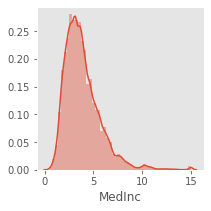

HouseAge
Skewness: 0.2852395112287575


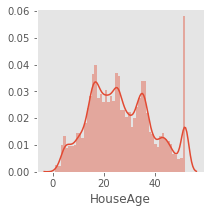

AveRooms
Skewness: 20.559552327462214


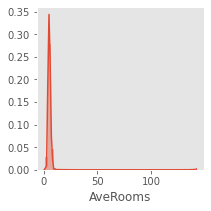

AveBedrms
Skewness: 47.30649518738124


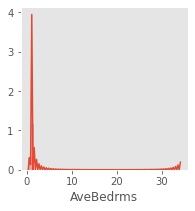

Population
Skewness: 5.566443614321245


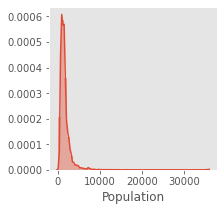

AveOccup
Skewness: 145.09724107211608


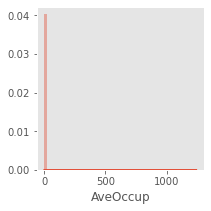

Latitude
Skewness: 0.45021664679867396


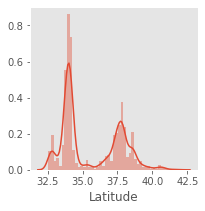

Longitude
Skewness: -0.30772752949967463


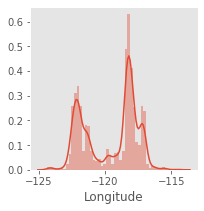

MedHouseVal
Skewness: 0.9732812886635116


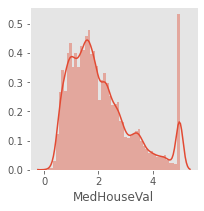

In [19]:
from scipy.stats import skew
for column in df_train:
    print(column)
    print(f"Skewness: {skew(df_train[column])}")
    plt.figure(figsize=(3,3))
    plt.style.use('ggplot')
    sns.distplot(df_train[column])
    plt.grid(False)
    plt.show()


### Handling Skewness
1. firstly we try to handle skewness for avgbedrooms as it has high skewness

In [20]:
# Interquantile Range
quantile1=df_train["AveBedrms"].quantile(0.25)
quantile2=df_train["AveBedrms"].quantile(0.75)

In [21]:
df_train["AveBedrms"]=np.where(df_train["AveBedrms"]<quantile1,quantile1,df_train["AveBedrms"])
df_train["AveBedrms"]=np.where(df_train["AveBedrms"]>quantile2,quantile2,df_train["AveBedrms"])

In [22]:
a = round(df_train['AveBedrms'].skew(),6)
print(a)

0.016843


In [23]:
df_train["AveBedrms"].skew()

0.016842704699000573

In [24]:
# Interquantile Range
quantile1=df_train["MedInc"].quantile(0.25)
quantile2=df_train["MedInc"].quantile(0.75)


In [25]:
df_train["MedInc"]=np.where(df_train["MedInc"]<quantile1,quantile1,df_train["MedInc"])
df_train["MedInc"]=np.where(df_train["MedInc"]>quantile2,quantile2,df_train["MedInc"])

In [26]:
b = round(df_train['MedInc'].skew(),6)
print(b)

0.126038


In [27]:
# Interquantile Range
quantile1=df_train["AveOccup"].quantile(0.25)
quantile2=df_train["AveOccup"].quantile(0.75)

In [28]:
df_train["AveOccup"]=np.where(df_train["AveOccup"]<quantile1,quantile1,df_train["AveOccup"])
df_train["AveOccup"]=np.where(df_train["AveOccup"]>quantile2,quantile2,df_train["AveOccup"])


In [29]:
c = round(df_train['AveOccup'].skew(),6)
print(c)

0.051801


In [30]:
# Interquantile Range
quantile1=df_train["AveRooms"].quantile(0.25)
quantile2=df_train["AveRooms"].quantile(0.75)

In [31]:
df_train["AveRooms"]=np.where(df_train["AveRooms"]<quantile1,quantile1,df_train["AveRooms"])
df_train["AveRooms"]=np.where(df_train["AveRooms"]>quantile2,quantile2,df_train["AveRooms"])

In [32]:
d = round(df_train['AveRooms'].skew(),6)
print(d)

0.029075


In [33]:
# Interquantile Range
quantile1=df_train["Population"].quantile(0.25)
quantile2=df_train["Population"].quantile(0.75)


In [34]:
df_train["Population"]=np.where(df_train["Population"]<quantile1,quantile1,df_train["Population"])
df_train["Population"]=np.where(df_train["Population"]>quantile2,quantile2,df_train["Population"])

In [35]:
e = round(df_train['Population'].skew(),6)
print(e)

0.075697


In [36]:
# Interquantile Range
quantile1=df_train["MedHouseVal"].quantile(0.25)
quantile2=df_train["MedHouseVal"].quantile(0.75)


In [37]:
df_train["MedHouseVal"]=np.where(df_train["MedHouseVal"]<quantile1,quantile1,df_train["MedHouseVal"])
df_train["MedHouseVal"]=np.where(df_train["MedHouseVal"]>quantile2,quantile2,df_train["MedHouseVal"])


In [38]:
f = round(df_train['MedHouseVal'].skew(),6)
print(f)

0.152228


In [39]:
## Afer removing skewness

In [40]:
df_train.skew()

MedInc         0.126038
HouseAge       0.285247
AveRooms       0.029075
AveBedrms      0.016843
Population     0.075697
AveOccup       0.051801
Latitude       0.450228
Longitude     -0.307736
MedHouseVal    0.152228
dtype: float64

MedInc
Skewness: 0.1260350300545522


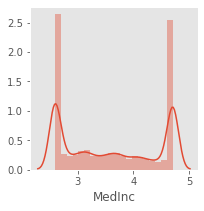

HouseAge
Skewness: 0.2852395112287575


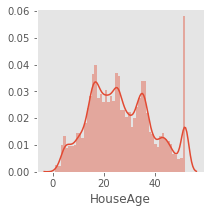

AveRooms
Skewness: 0.029074542509282954


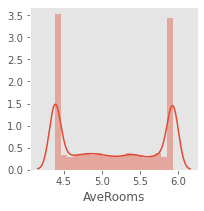

AveBedrms
Skewness: 0.01684226742743497


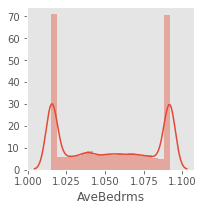

Population
Skewness: 0.07569535280775203


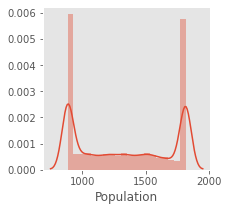

AveOccup
Skewness: 0.05179941722234995


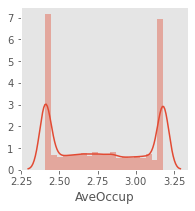

Latitude
Skewness: 0.45021664679867396


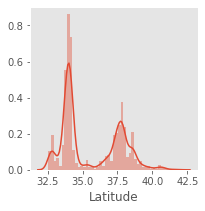

Longitude
Skewness: -0.30772752949967463


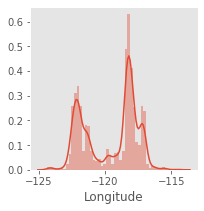

MedHouseVal
Skewness: 0.15222432691134585


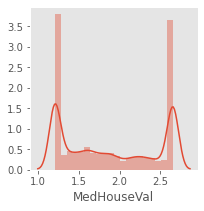

In [41]:
from scipy.stats import skew
for column in df_train:
    print(column)
    print(f"Skewness: {skew(df_train[column])}")
    plt.figure(figsize=(3,3))
    plt.style.use('ggplot')
    sns.distplot(df_train[column])
    plt.grid(False)
    plt.show()


### Dealing with target variable

In [43]:
df_train["MedHouseVal"]

0        1.203
1        1.203
2        1.576
3        1.336
4        2.657
         ...  
57772    1.203
57773    1.203
57774    1.203
57775    1.203
57776    1.203
Name: MedHouseVal, Length: 57777, dtype: float64

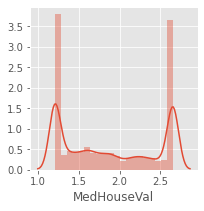

In [44]:
fig,ax = plt.subplots(figsize=(3,3))
sns.distplot(df_train['MedHouseVal'])
plt.show()

In [45]:
correlation=df_train.corr()

In [46]:
correlation

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.128482  0.640324  -0.229239   -0.033571  0.004171   
HouseAge    -0.128482  1.000000 -0.179853  -0.070007   -0.274937 -0.050571   
AveRooms     0.640324 -0.179853  1.000000  -0.050213   -0.099232  0.091651   
AveBedrms   -0.229239 -0.070007 -0.050213   1.000000    0.038134 -0.112892   
Population  -0.033571 -0.274937 -0.099232   0.038134    1.000000  0.180022   
AveOccup     0.004171 -0.050571  0.091651  -0.112892    0.180022  1.000000   
Latitude    -0.064445  0.018719  0.120459   0.018948   -0.105592 -0.136438   
Longitude   -0.041029 -0.096837 -0.093730   0.019358    0.100062  0.156617   
MedHouseVal  0.636080  0.067986  0.270843  -0.111495   -0.039139 -0.215207   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.064445  -0.041029     0.636080  
HouseAge     0.018719  -0.096837     0.067986  
AveRooms     0.120459  -0.093730     0.270843  
AveBedrms    0.018948   0.019358    -0.111495  
Population  -0.105592   0.100062    -0.039139  
AveOccup    -0.136438   0.156617    -0.215207  
Latitude     1.000000  -0.932656    -0.129196  
Longitude   -0.932656   1.000000    -0.063603  
MedHouseVal -0.129196  -0.063603     1.000000

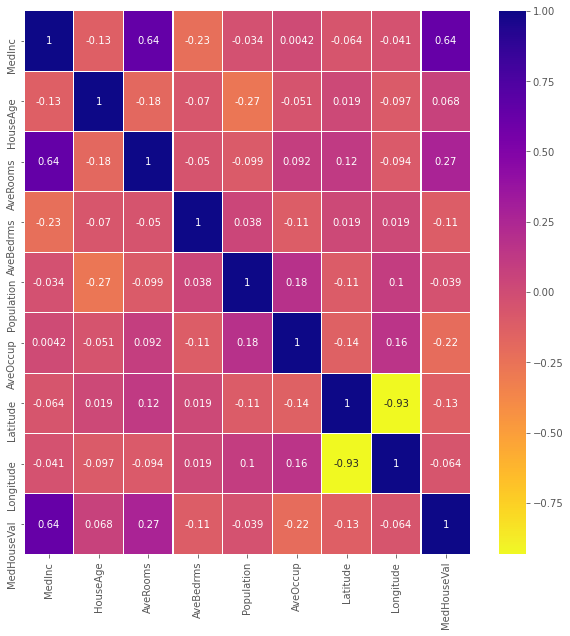

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='plasma_r',linewidths=0.2)
plt.show()


### Now we try to handle the test data

In [49]:
df_test.skew()

MedInc          1.517513
HouseAge        0.403884
AveRooms        3.772418
AveBedrms      28.018172
Population      7.301156
AveOccup      113.054914
Latitude        0.426951
Longitude      -0.292687
dtype: float64

MedInc
Skewness: 1.5174211997393714


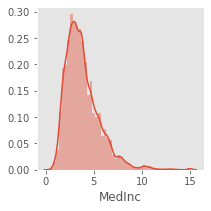

HouseAge
Skewness: 0.40385950951663646


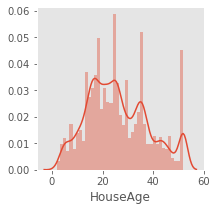

AveRooms
Skewness: 3.772189199761466


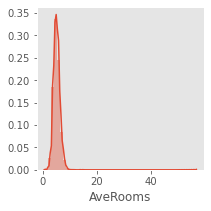

AveBedrms
Skewness: 28.01647444626417


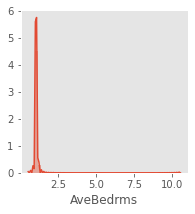

Population
Skewness: 7.30071366974084


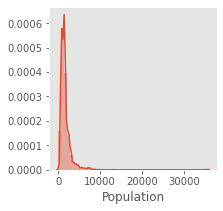

AveOccup
Skewness: 113.04806462278002


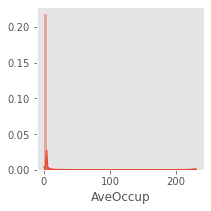

Latitude
Skewness: 0.4269248633046248


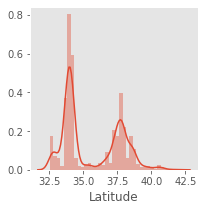

Longitude
Skewness: -0.2926689056676865


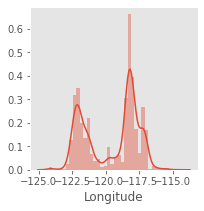

In [50]:
from scipy.stats import skew
for column in df_test:
    print(column)
    print(f"Skewness: {skew(df_test[column])}")
    plt.figure(figsize=(3,3))
    plt.style.use('ggplot')
    sns.distplot(df_test[column])
    plt.grid(False)
    plt.show()


In [51]:
df_test.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

### Removing Skewness

In [53]:
skewed_columns=['MedInc','AveRooms','AveBedrms','Population','AveOccup']

In [54]:
for i in skewed_columns:
    # Interquantile Range
    quantile1=df_test[i].quantile(0.25)
    quantile2=df_test[i].quantile(0.75)
    df_test[i]=np.where(df_test[i]<quantile1,quantile1,df_test[i])
    df_test[i]=np.where(df_test[i]>quantile2,quantile2,df_test[i])


    

In [55]:
df_test.skew()

MedInc        0.148216
HouseAge      0.403884
AveRooms      0.018701
AveBedrms     0.001988
Population    0.047090
AveOccup      0.023744
Latitude      0.426951
Longitude    -0.292687
dtype: float64

MedInc
Skewness: 0.14820682800529522


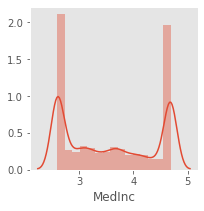

HouseAge
Skewness: 0.40385950951663646


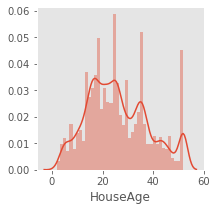

AveRooms
Skewness: 0.018699510253487022


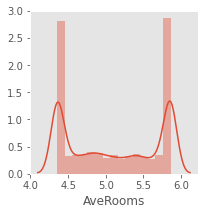

AveBedrms
Skewness: 0.001987723644491171


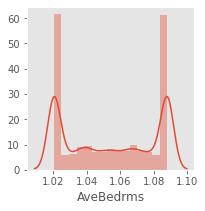

Population
Skewness: 0.04708724324457071


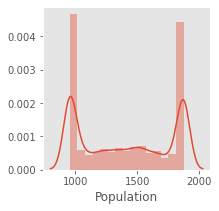

AveOccup
Skewness: 0.023742973852089712


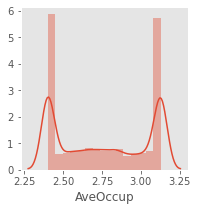

Latitude
Skewness: 0.4269248633046248


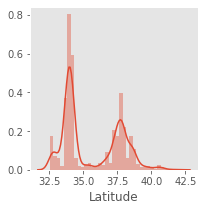

Longitude
Skewness: -0.2926689056676865


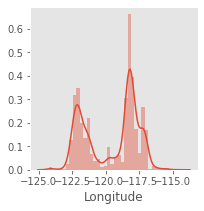

In [56]:
from scipy.stats import skew
for column in df_test:
    print(column)
    print(f"Skewness: {skew(df_test[column])}")
    plt.figure(figsize=(3,3))
    plt.style.use('ggplot')
    sns.distplot(df_test[column])
    plt.grid(False)
    plt.show()


In [57]:
test_correlation=df_test.corr()

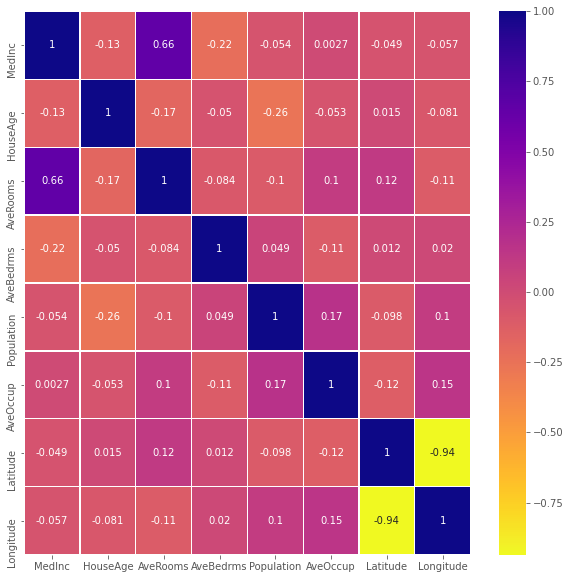

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(test_correlation,annot=True,cmap='plasma_r',linewidths=0.2)
plt.show()

In [59]:
# now lets see if location affects the median house price
# generated train data scatter plot 
fig = px.scatter_mapbox(df_train,lat='Latitude',lon='Longitude',color='MedHouseVal',zoom=5)
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Insights

1. Location of house matters in predicting the median house price.

#### Even though correlations by heatmap give us a clear picture,  It's also important to plot the bivariate distribution with the target to guage a relation 

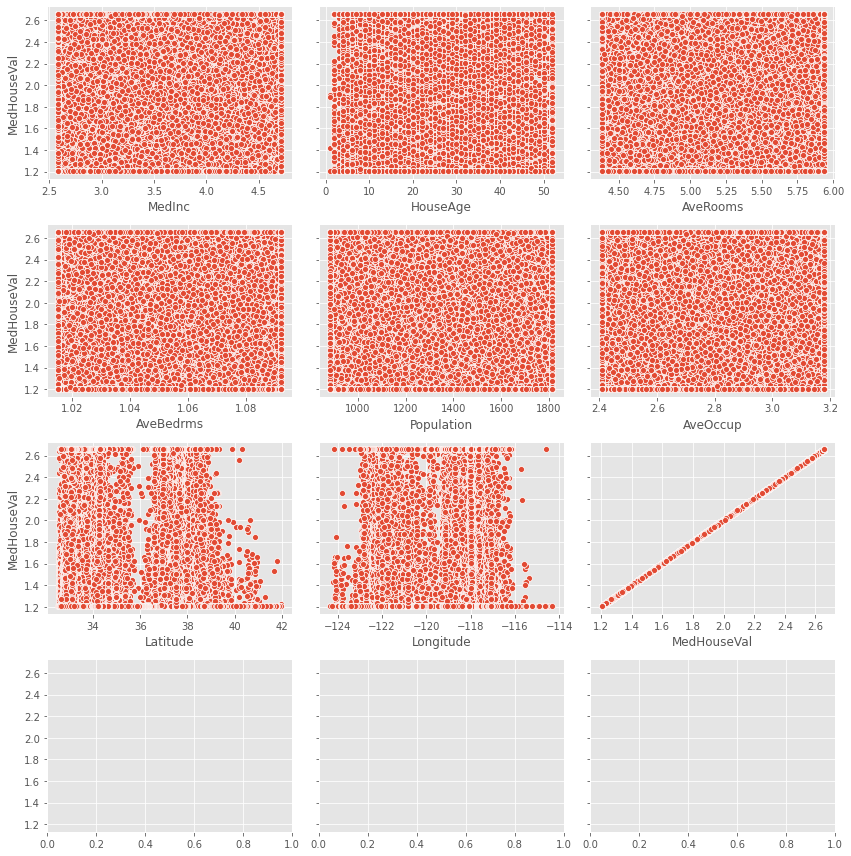

In [60]:
fig, ax = plt.subplots(4, 3, figsize=(12, 12),sharey=True)
ax = ax.flatten()

features=df_train.columns
for i, col in enumerate(features):
    sns.scatterplot(x=df_train[col],y=df_train["MedHouseVal"],ax=ax[i])
    

fig.tight_layout()
plt.show()


### relation between MedHouseval and MedInc

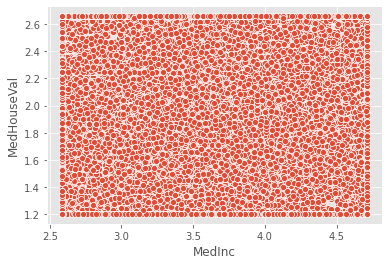

In [61]:
sns.scatterplot(data=df_train,y='MedHouseVal',x='MedInc')

In [62]:
df_train["AveRooms"]

0        4.381443
1        5.936031
2        5.936031
3        4.381443
4        4.381443
           ...   
57772    5.045455
57773    5.936031
57774    5.205543
57775    5.329513
57776    5.254717
Name: AveRooms, Length: 57777, dtype: float64

### splitting the data

In [63]:
X = df_train.iloc[:,0:8]
X.head(2)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.5882      15.0  4.381443   1.091837      1280.0  2.486989     34.60   
1  3.7188      17.0  5.936031   1.054217      1504.0  3.179673     38.69   

   Longitude  
0    -120.12  
1    -121.22

In [64]:
y = df_train.MedHouseVal
y.head(2)

0    1.203
1    1.203
Name: MedHouseVal, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=101)

In [67]:
print(X_train.shape)
print(X_val.shape)

(38710, 8)
(19067, 8)


A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction

### Model Building

In [68]:
!pip install catboost


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
import catboost as cb

In [70]:
!pip install lightgbm


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Necessary imports for Model Building

In [71]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgbm
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer


In [72]:
# get a list of models to evaluate
def get_models():
    models = dict()
    
    # define the pipeline
    scaler = RobustScaler()
    power = PowerTransformer(method = 'yeo-johnson')
    
    reg1 = RandomForestRegressor() 
    reg2 = CatBoostRegressor(verbose=False) 
    reg3 = XGBRegressor() 
    reg4 = LGBMRegressor() 

    models['Random Forest'] = Pipeline(steps=[('s', scaler), ('p', power), ('m', reg1)])
    models['Cat Boost'] = Pipeline(steps=[('s', scaler), ('p', power), ('m', reg2)])
    models['XGBoost'] = Pipeline(steps=[('s', scaler), ('p', power), ('m', reg3)])
    models['LightGBM'] = Pipeline(steps=[('s', scaler), ('p', power), ('m', reg4)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
    cv = KFold(n_splits=5, shuffle=True, random_state=7)
    scores = cross_val_score(model, X_train, y_train, scoring= 'neg_root_mean_squared_error' , cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()


### Evaluate the models and store results

>Random Forest 0.305 (0.005)
>Cat Boost 0.289 (0.003)
>XGBoost 0.298 (0.003)
>LightGBM 0.295 (0.004)


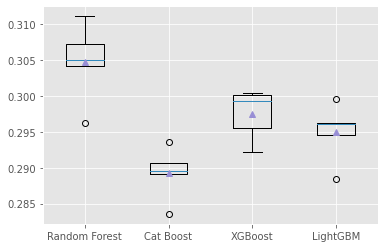

In [73]:
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    scores = -scores
    results.append(scores)
    names.append(name)
    print( '>%s %.3f (%.3f)'  % (name, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()


### Perform model training

In [74]:
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

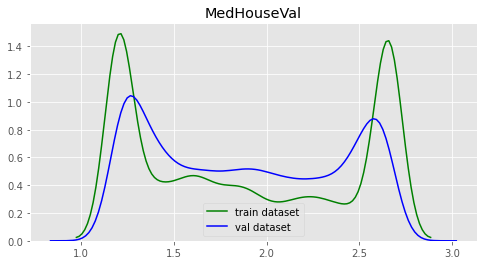

In [75]:
fig, ax = plt.subplots(1,1,figsize=(8, 4))

sns.kdeplot(data=y_train, color='green', ax=ax, label='train dataset')
sns.kdeplot(data=y_pred, color='blue', ax=ax, label='val dataset')
ax.set(title='MedHouseVal')

plt.legend()
plt.show()


### Here we are using the Voting Regressor to compile all models together 

### A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction.

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
reg1 = GradientBoostingRegressor(random_state=1)

from sklearn.ensemble import RandomForestRegressor
reg2 = RandomForestRegressor(random_state=1)

from sklearn.linear_model import LinearRegression
reg3 = LinearRegression()

from catboost import CatBoostRegressor
reg4= CatBoostRegressor()

from sklearn.ensemble import VotingRegressor
regressor = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lir', reg3),('cb',reg4)])

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_val)
y_pred

Learning rate set to 0.072955
0:	learn: 0.5647192	total: 147ms	remaining: 2m 26s
1:	learn: 0.5443746	total: 156ms	remaining: 1m 17s
2:	learn: 0.5257308	total: 166ms	remaining: 55.2s
3:	learn: 0.5091928	total: 176ms	remaining: 43.8s
4:	learn: 0.4946197	total: 186ms	remaining: 37s
5:	learn: 0.4809311	total: 196ms	remaining: 32.5s
6:	learn: 0.4689017	total: 205ms	remaining: 29s
7:	learn: 0.4581135	total: 215ms	remaining: 26.6s
8:	learn: 0.4474248	total: 223ms	remaining: 24.6s
9:	learn: 0.4374663	total: 232ms	remaining: 23s
10:	learn: 0.4292435	total: 242ms	remaining: 21.8s
11:	learn: 0.4217279	total: 252ms	remaining: 20.8s
12:	learn: 0.4130535	total: 261ms	remaining: 19.8s
13:	learn: 0.4052686	total: 270ms	remaining: 19s
14:	learn: 0.3983913	total: 279ms	remaining: 18.3s
15:	learn: 0.3931712	total: 287ms	remaining: 17.7s
16:	learn: 0.3875809	total: 296ms	remaining: 17.1s
17:	learn: 0.3828904	total: 303ms	remaining: 16.5s
18:	learn: 0.3792832	total: 312ms	remaining: 16.1s
19:	learn: 0.3760

172:	learn: 0.2982583	total: 1.51s	remaining: 7.21s
173:	learn: 0.2981057	total: 1.52s	remaining: 7.2s
174:	learn: 0.2980374	total: 1.53s	remaining: 7.2s
175:	learn: 0.2979444	total: 1.53s	remaining: 7.18s
176:	learn: 0.2978277	total: 1.54s	remaining: 7.18s
177:	learn: 0.2976602	total: 1.55s	remaining: 7.18s
178:	learn: 0.2975978	total: 1.56s	remaining: 7.17s
179:	learn: 0.2974622	total: 1.57s	remaining: 7.16s
180:	learn: 0.2973311	total: 1.58s	remaining: 7.16s
181:	learn: 0.2972001	total: 1.59s	remaining: 7.15s
182:	learn: 0.2971108	total: 1.6s	remaining: 7.14s
183:	learn: 0.2969449	total: 1.61s	remaining: 7.13s
184:	learn: 0.2968125	total: 1.61s	remaining: 7.12s
185:	learn: 0.2966978	total: 1.62s	remaining: 7.1s
186:	learn: 0.2965577	total: 1.63s	remaining: 7.09s
187:	learn: 0.2964868	total: 1.64s	remaining: 7.08s
188:	learn: 0.2963841	total: 1.65s	remaining: 7.06s
189:	learn: 0.2962657	total: 1.65s	remaining: 7.05s
190:	learn: 0.2961432	total: 1.66s	remaining: 7.04s
191:	learn: 0.29

336:	learn: 0.2849180	total: 2.85s	remaining: 5.61s
337:	learn: 0.2848819	total: 2.86s	remaining: 5.6s
338:	learn: 0.2848349	total: 2.87s	remaining: 5.59s
339:	learn: 0.2847868	total: 2.87s	remaining: 5.58s
340:	learn: 0.2847279	total: 2.88s	remaining: 5.57s
341:	learn: 0.2846648	total: 2.89s	remaining: 5.55s
342:	learn: 0.2846129	total: 2.89s	remaining: 5.54s
343:	learn: 0.2845638	total: 2.9s	remaining: 5.53s
344:	learn: 0.2845161	total: 2.91s	remaining: 5.52s
345:	learn: 0.2844609	total: 2.92s	remaining: 5.51s
346:	learn: 0.2844104	total: 2.92s	remaining: 5.5s
347:	learn: 0.2843378	total: 2.93s	remaining: 5.49s
348:	learn: 0.2842643	total: 2.94s	remaining: 5.48s
349:	learn: 0.2841975	total: 2.94s	remaining: 5.47s
350:	learn: 0.2841242	total: 2.95s	remaining: 5.45s
351:	learn: 0.2840831	total: 2.96s	remaining: 5.44s
352:	learn: 0.2840297	total: 2.96s	remaining: 5.43s
353:	learn: 0.2839717	total: 2.97s	remaining: 5.42s
354:	learn: 0.2839399	total: 2.98s	remaining: 5.41s
355:	learn: 0.2

509:	learn: 0.2771789	total: 4.23s	remaining: 4.07s
510:	learn: 0.2771185	total: 4.24s	remaining: 4.06s
511:	learn: 0.2770754	total: 4.25s	remaining: 4.05s
512:	learn: 0.2770362	total: 4.25s	remaining: 4.04s
513:	learn: 0.2769998	total: 4.26s	remaining: 4.03s
514:	learn: 0.2769475	total: 4.27s	remaining: 4.02s
515:	learn: 0.2769203	total: 4.27s	remaining: 4.01s
516:	learn: 0.2768700	total: 4.28s	remaining: 4s
517:	learn: 0.2768276	total: 4.29s	remaining: 3.99s
518:	learn: 0.2767921	total: 4.29s	remaining: 3.98s
519:	learn: 0.2767729	total: 4.3s	remaining: 3.97s
520:	learn: 0.2767424	total: 4.31s	remaining: 3.96s
521:	learn: 0.2766978	total: 4.34s	remaining: 3.97s
522:	learn: 0.2766566	total: 4.35s	remaining: 3.97s
523:	learn: 0.2766225	total: 4.36s	remaining: 3.96s
524:	learn: 0.2766011	total: 4.37s	remaining: 3.95s
525:	learn: 0.2765492	total: 4.38s	remaining: 3.94s
526:	learn: 0.2765015	total: 4.38s	remaining: 3.93s
527:	learn: 0.2764493	total: 4.39s	remaining: 3.92s
528:	learn: 0.27

673:	learn: 0.2714645	total: 5.4s	remaining: 2.61s
674:	learn: 0.2714397	total: 5.41s	remaining: 2.6s
675:	learn: 0.2714035	total: 5.41s	remaining: 2.6s
676:	learn: 0.2713786	total: 5.42s	remaining: 2.59s
677:	learn: 0.2713529	total: 5.43s	remaining: 2.58s
678:	learn: 0.2713206	total: 5.43s	remaining: 2.57s
679:	learn: 0.2712852	total: 5.44s	remaining: 2.56s
680:	learn: 0.2712576	total: 5.45s	remaining: 2.55s
681:	learn: 0.2712315	total: 5.45s	remaining: 2.54s
682:	learn: 0.2712032	total: 5.46s	remaining: 2.54s
683:	learn: 0.2711798	total: 5.47s	remaining: 2.53s
684:	learn: 0.2711188	total: 5.48s	remaining: 2.52s
685:	learn: 0.2710997	total: 5.48s	remaining: 2.51s
686:	learn: 0.2710559	total: 5.49s	remaining: 2.5s
687:	learn: 0.2710204	total: 5.5s	remaining: 2.49s
688:	learn: 0.2709888	total: 5.51s	remaining: 2.48s
689:	learn: 0.2709656	total: 5.51s	remaining: 2.48s
690:	learn: 0.2709422	total: 5.52s	remaining: 2.47s
691:	learn: 0.2709113	total: 5.53s	remaining: 2.46s
692:	learn: 0.270

836:	learn: 0.2666391	total: 6.57s	remaining: 1.28s
837:	learn: 0.2666135	total: 6.58s	remaining: 1.27s
838:	learn: 0.2665909	total: 6.58s	remaining: 1.26s
839:	learn: 0.2665547	total: 6.59s	remaining: 1.25s
840:	learn: 0.2665349	total: 6.6s	remaining: 1.25s
841:	learn: 0.2664926	total: 6.61s	remaining: 1.24s
842:	learn: 0.2664740	total: 6.62s	remaining: 1.23s
843:	learn: 0.2664289	total: 6.63s	remaining: 1.22s
844:	learn: 0.2663963	total: 6.63s	remaining: 1.22s
845:	learn: 0.2663688	total: 6.64s	remaining: 1.21s
846:	learn: 0.2663501	total: 6.65s	remaining: 1.2s
847:	learn: 0.2663192	total: 6.66s	remaining: 1.19s
848:	learn: 0.2662834	total: 6.67s	remaining: 1.19s
849:	learn: 0.2662626	total: 6.67s	remaining: 1.18s
850:	learn: 0.2662389	total: 6.68s	remaining: 1.17s
851:	learn: 0.2662196	total: 6.69s	remaining: 1.16s
852:	learn: 0.2661856	total: 6.7s	remaining: 1.15s
853:	learn: 0.2661699	total: 6.7s	remaining: 1.15s
854:	learn: 0.2661337	total: 6.71s	remaining: 1.14s
855:	learn: 0.26

array([1.50605396, 2.00937798, 2.2811552 , ..., 2.63061028, 2.2243995 ,
       1.45017539])

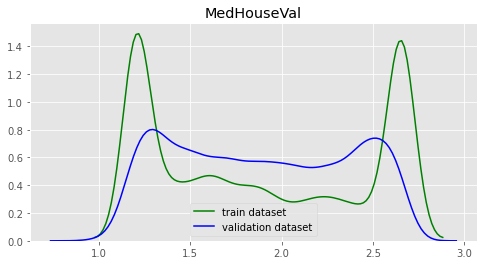

In [77]:
fig, ax = plt.subplots(1,1,figsize=(8, 4))

sns.kdeplot(data=y_train, color='green', ax=ax, label='train dataset')
sns.kdeplot(data=y_pred, color='blue', ax=ax, label='validation dataset')
ax.set(title='MedHouseVal')

plt.legend()
plt.show()


### Model evaluation

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
print(np.sqrt(mean_squared_error(y_val,y_pred)))

0.30454039310705766


In [80]:
X_train.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
50996  3.6620       8.0  5.936031   1.018450       882.0  2.546125     34.48   
32719  2.6548      39.0  4.381443   1.015306      1609.0  3.179673     33.77   
27979  2.5882      15.0  4.381443   1.064777       882.0  3.179673     37.97   
34138  2.5882      43.0  4.381443   1.028721      1460.0  3.178503     34.05   
31986  2.5882      25.0  4.762500   1.015306      1001.0  2.600000     34.11   

       Longitude  
50996    -117.27  
32719    -118.17  
27979    -122.33  
34138    -118.27  
31986    -117.17

In [81]:
X_val.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14078  2.5882      27.0  4.381443   1.071689      1557.0  2.407625     32.71   
2361   3.7622       5.0  5.136449   1.091837      1815.0  2.656380     34.61   
54885  4.3365      15.0  5.020270   1.047297       882.0  2.407625     37.29   
5207   3.0964      32.0  4.381443   1.015306      1815.0  3.179673     33.85   
32281  4.7109      19.0  5.448071   1.015306      1238.0  2.407625     37.74   

       Longitude  
14078    -117.10  
2361     -120.16  
54885    -121.75  
5207     -117.88  
32281    -122.48

In [82]:
df_test.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.59015      35.0  4.966368   1.088295      1318.0  2.844411     39.75   
1  2.59015      22.0  4.356443   1.088295      1874.0  3.129167     33.95   
2  4.68750      21.0  5.858646   1.020460      1535.0  2.888889     33.61   
3  4.68060      49.0  4.769697   1.048485       955.0  2.400000     34.17   
4  3.12840      25.0  4.356443   1.081633      1874.0  2.400000     34.17   

   Longitude  
0    -121.85  
1    -118.29  
2    -117.81  
3    -118.34  
4    -118.29

### Final Prediction

In [83]:
final_pred=regressor.predict(df_test)

In [84]:
final_pred

array([1.15893296, 1.44067335, 2.23604428, ..., 1.43061814, 2.26812078,
       2.40521335])